# Project 01: Analysis of the tmdb database<a href="#Project-01:-Analysis-of-the-tmdb-database" class="anchor-link">¶</a>

## Table of Contents<a href="#Table-of-Contents" class="anchor-link">¶</a>

-   [Introduction](#intro)
-   [Data Wrangling](#wrangling)
-   [Exploratory Data Analysis](#eda)
-   [Conclusions](#conclusions)

<span id="intro"></span>

## Introduction<a href="#Introduction" class="anchor-link">¶</a>

### Dataset Description<a href="#Dataset-Description" class="anchor-link">¶</a>

> This data set contains information about 10866 movies collected
> between years 1960 and 2015 from The Movie Database (TMDb).It contains
> 21 columns with informations about genre, budget,revenue, cast,
> popularity rating, average vote, vote count, keyword, tagline etc of
> each movie. this analysis will be looking at the general
> characteristics of profitable and unprofitable movies (which may also
> be reffered to as loss movies for  the most part) over the decades
> focusing on budget and popularity rating.

### Question(s) that can be answered with the dataset<a href="#Question(s)-that-can-be-answered-with-the-dataset" class="anchor-link">¶</a>

> what percentage of the movies made profit or loss
>
> how does movies profit changes across release seasons
>
> relationship between popularity and profit
>
> which production companies are most successful what genres made the
> most profit

In \[1\]:

    #importing packages  planned to use.
    import pandas as pd 
    import numpy as np 
    from matplotlib import pyplot as plt
    import seaborn 
    % matplotlib inline

In \[2\]:

    # Upgrade pandas to use dataframe.explode() function. 
    #!pip install --upgrade pandas==0.25.0

<span id="wrangling"></span>

## Data Wrangling<a href="#Data-Wrangling" class="anchor-link">¶</a>

In \[3\]:

    # Loading dataset and inspecting properties
    df_movies = pd.read_csv('tmdb-movies.csv')
    df_movies.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 10866 entries, 0 to 10865
    Data columns (total 21 columns):
    id                      10866 non-null int64
    imdb_id                 10856 non-null object
    popularity              10866 non-null float64
    budget                  10866 non-null int64
    revenue                 10866 non-null int64
    original_title          10866 non-null object
    cast                    10790 non-null object
    homepage                2936 non-null object
    director                10822 non-null object
    tagline                 8042 non-null object
    keywords                9373 non-null object
    overview                10862 non-null object
    runtime                 10866 non-null int64
    genres                  10843 non-null object
    production_companies    9836 non-null object
    release_date            10866 non-null object
    vote_count              10866 non-null int64
    vote_average            10866 non-null float64
    release_year            10866 non-null int64
    budget_adj              10866 non-null float64
    revenue_adj             10866 non-null float64
    dtypes: float64(4), int64(6), object(11)
    memory usage: 1.7+ MB

### Data Cleaning<a href="#Data-Cleaning" class="anchor-link">¶</a>

> based on observations of the dataset and intended exploration, these
> following cleaning steps will be taken on the dataset
>
> ######  1 drop unwanted columns<a href="#%C2%A01-drop-unwanted-columns" class="anchor-link">¶</a>
>
> the following columns will be dropped from the datasset since they
> don't contain any variable I intend to explore based on the questions
> above :

| column name | drop reason                         |
|:------------|:------------------------------------|
| tmdb_id     | we already have an id column        |
| budget      | hasn't been corrected for inflation |
| revenue     | hasn't been corrected for inflation |
| homepage    | not relevant for the analysis       |
| tagline     | not relevant for the analysis       |
| keyword     | not relevant for the analysis       |
| overview    | not relevant for the analysis       |
| id          | not relevant for the analysis       |

######   fix null rows<a href="#%C2%A0-fix-null-rows" class="anchor-link">¶</a>

> the null cells are only present in 'cast', 'director' and
> 'production_company' columns and they will be filled with 'unknown'
> since they are not the main variables for this analysis. every other
> column with null rows will have been dropped

#####  fix data type<a href="#%C2%A0fix-data-type" class="anchor-link">¶</a>

> change 'release_date' columns type from strng to date and format
> numbers columns as int

#### create a profits and profit rank column<a href="#create-a-profits-and-profit-rank-column" class="anchor-link">¶</a>

> subracting budget_adj from revenue_adj to get a profits column as main
> variable a profit rank columnn will be created for easy referencing

In \[4\]:

    # After discussing the structure of the data and any problems that need to be
    #   cleaned, perform those cleaning steps in the second part of this section.
    # dropping unwanted columns
    df_movies.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'tagline', 'overview','id'], axis = 1, inplace = True)
    df_movies.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 10866 entries, 0 to 10865
    Data columns (total 13 columns):
    popularity              10866 non-null float64
    original_title          10866 non-null object
    cast                    10790 non-null object
    director                10822 non-null object
    runtime                 10866 non-null int64
    genres                  10843 non-null object
    production_companies    9836 non-null object
    release_date            10866 non-null object
    vote_count              10866 non-null int64
    vote_average            10866 non-null float64
    release_year            10866 non-null int64
    budget_adj              10866 non-null float64
    revenue_adj             10866 non-null float64
    dtypes: float64(4), int64(3), object(6)
    memory usage: 1.1+ MB

In \[5\]:

    #fixing null rows
    #filling null rows with 'unknown' in columns 'cast', 'director','genres'and 'production_companies'
    df_movies['cast'].fillna('unknown', inplace = True)
    df_movies['director'].fillna('unknown', inplace = True)
    df_movies['genres'].fillna('unknown', inplace = True)
    df_movies['production_companies'].fillna('unknown', inplace = True)
    #confirming for null values
    df_movies.isnull().sum().any()

Out\[5\]:

    False

In \[6\]:

    #adding a profits column 
    df_movies['profits']= df_movies.revenue_adj-df_movies.budget_adj

In \[7\]:

    #adding a profit rank column 
    df_movies.sort_values(by='profits',ascending=False,inplace=True)      
    df_movies['profit_rank']= df_movies.profits.reset_index().index +1
    df_movies.head(5)

Out\[7\]:

|       | popularity | original_title | cast                                                 | director         | runtime | genres                                      | production_companies                               | release_date | vote_count | vote_average | release_year | budget_adj   | revenue_adj  | profits      | profit_rank |
|-------|------------|----------------|------------------------------------------------------|------------------|---------|---------------------------------------------|----------------------------------------------------|--------------|------------|--------------|--------------|--------------|--------------|--------------|-------------|
| 1329  | 12.037933  | Star Wars      | Mark Hamill\|Harrison Ford\|Carrie Fisher\|Peter ... | George Lucas     | 121     | Adventure\|Action\|Science Fiction          | Lucasfilm\|Twentieth Century Fox Film Corporation  | 3/20/77      | 4428       | 7.9          | 1977         | 3.957559e+07 | 2.789712e+09 | 2.750137e+09 | 1           |
| 1386  | 9.432768   | Avatar         | Sam Worthington\|Zoe Saldana\|Sigourney Weaver\|S... | James Cameron    | 162     | Action\|Adventure\|Fantasy\|Science Fiction | Ingenious Film Partners\|Twentieth Century Fox ... | 12/10/09     | 8458       | 7.1          | 2009         | 2.408869e+08 | 2.827124e+09 | 2.586237e+09 | 2           |
| 5231  | 4.355219   | Titanic        | Kate Winslet\|Leonardo DiCaprio\|Frances Fisher\|... | James Cameron    | 194     | Drama\|Romance\|Thriller                    | Paramount Pictures\|Twentieth Century Fox Film ... | 11/18/97     | 4654       | 7.3          | 1997         | 2.716921e+08 | 2.506406e+09 | 2.234714e+09 | 3           |
| 10594 | 2.010733   | The Exorcist   | Linda Blair\|Max von Sydow\|Ellen Burstyn\|Jason ... | William Friedkin | 122     | Drama\|Horror\|Thriller                     | Warner Bros.\|Hoya Productions                     | 12/26/73     | 1113       | 7.2          | 1973         | 3.928928e+07 | 2.167325e+09 | 2.128036e+09 | 4           |
| 9806  | 2.563191   | Jaws           | Roy Scheider\|Robert Shaw\|Richard Dreyfuss\|Lorr... | Steven Spielberg | 124     | Horror\|Thriller\|Adventure                 | Universal Pictures\|Zanuck/Brown Productions       | 6/18/75      | 1415       | 7.3          | 1975         | 2.836275e+07 | 1.907006e+09 | 1.878643e+09 | 5           |

In \[8\]:

    #changing release_date column's data type to date 
    df_movies.release_date =df_movies.release_date.astype('datetime64')
    df_movies.profits =df_movies.profits.astype('int64')
    df_movies.budget_adj =df_movies.budget_adj.round(0).astype('int64')
    df_movies.revenue_adj =df_movies.revenue_adj.round(0).astype('int64')
    #confirming changes
    #df_movies.dtypes[['release_date','profits','budget_adj','revenue_adj']]
    df_movies.head()

Out\[8\]:

|       | popularity | original_title | cast                                                 | director         | runtime | genres                                      | production_companies                               | release_date | vote_count | vote_average | release_year | budget_adj | revenue_adj | profits    | profit_rank |
|-------|------------|----------------|------------------------------------------------------|------------------|---------|---------------------------------------------|----------------------------------------------------|--------------|------------|--------------|--------------|------------|-------------|------------|-------------|
| 1329  | 12.037933  | Star Wars      | Mark Hamill\|Harrison Ford\|Carrie Fisher\|Peter ... | George Lucas     | 121     | Adventure\|Action\|Science Fiction          | Lucasfilm\|Twentieth Century Fox Film Corporation  | 1977-03-20   | 4428       | 7.9          | 1977         | 39575591   | 2789712242  | 2750136650 | 1           |
| 1386  | 9.432768   | Avatar         | Sam Worthington\|Zoe Saldana\|Sigourney Weaver\|S... | James Cameron    | 162     | Action\|Adventure\|Fantasy\|Science Fiction | Ingenious Film Partners\|Twentieth Century Fox ... | 2009-12-10   | 8458       | 7.1          | 2009         | 240886903  | 2827123750  | 2586236847 | 2           |
| 5231  | 4.355219   | Titanic        | Kate Winslet\|Leonardo DiCaprio\|Frances Fisher\|... | James Cameron    | 194     | Drama\|Romance\|Thriller                    | Paramount Pictures\|Twentieth Century Fox Film ... | 1997-11-18   | 4654       | 7.3          | 1997         | 271692064  | 2506405735  | 2234713671 | 3           |
| 10594 | 2.010733   | The Exorcist   | Linda Blair\|Max von Sydow\|Ellen Burstyn\|Jason ... | William Friedkin | 122     | Drama\|Horror\|Thriller                     | Warner Bros.\|Hoya Productions                     | 1973-12-26   | 1113       | 7.2          | 1973         | 39289277   | 2167324901  | 2128035624 | 4           |
| 9806  | 2.563191   | Jaws           | Roy Scheider\|Robert Shaw\|Richard Dreyfuss\|Lorr... | Steven Spielberg | 124     | Horror\|Thriller\|Adventure                 | Universal Pictures\|Zanuck/Brown Productions       | 1975-06-18   | 1415       | 7.3          | 1975         | 28362748   | 1907005842  | 1878643093 | 5           |

<span id="eda"></span>

## Exploratory Data Analysis<a href="#Exploratory-Data-Analysis" class="anchor-link">¶</a>

### Research Questions<a href="#Research-Questions" class="anchor-link">¶</a>

## Question 1<a href="#Question-1" class="anchor-link">¶</a>

##### How has movie finance changed throughout the dataset<a href="#How-has-movie-finance--changed-throughout-the-dataset" class="anchor-link">¶</a>

In \[9\]:

    #the dataset will eventually be segmented into decades for easier analysis 
    #           QUESTION 1.1
    #what percentage of movies in the dataset made a profit
    profit = df_movies.profits>=1
    loss = df_movies.profits< 1
    p= (df_movies[profit].shape[0]/df_movies.shape[0])*100
    l= (df_movies[loss].shape[0]/df_movies.shape[0])*100
    plt.bar([1,2],[p,l],tick_label=['profit%','loss%'],color=['green','red'])
    plt.title('percentage of profitable movies in the dataset')
    plt.text(1,p,str(round(p))+'%')

Out\[9\]:

    Text(1,34.7138,'35%')

![](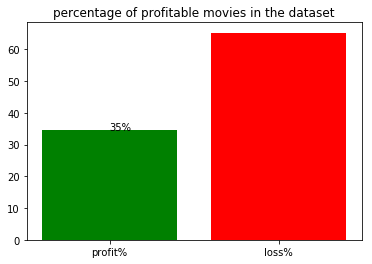%0A)

In \[10\]:

    #       Question1.2 
    # how much is the total profit and loss madecfor all movies in the dataset
    height1 = [df_movies[profit].sum().profits, -1*(df_movies[loss].sum().profits)]    
    plt.bar([1,2], height1 ,color=['green','red'],tick_label=['total profit','total loss'],alpha =.5)
    plt.text(1,height1[0],str(height1[0]))
    plt.text(2,height1[1],str(height1[1]))
    plt.title('total sum of profit and loss made') 

Out\[10\]:

    Text(0.5,1,'total sum of profit and loss made')

![](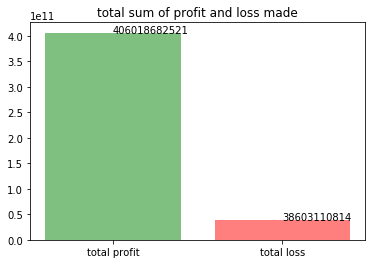%0A)

In \[11\]:

    #total profit to total loss ratio
    r = height1[0]/height1[1]
    r

Out\[11\]:

    10.517771080090032

In \[12\]:

    #       QUESTION 1.4
    # Which decade has the highest number of profitable movies? 
    # NUMBER OF MOVIES THAT MADE PROFIT OR LOSS PER RELEASE DECADE
    # we'll have to create a decade's column from the release_year 
    list1= [np.arange(1960,1970,1),np.arange(1970,1980,1),np.arange(1980,1990,1),np.arange(1990,2000,1),np.arange(2000,2010,1),np.arange(2010,2020,1)]
    def decade(d) :
        if d in list1[0]:
            return 1960
        elif d in list1[1]:
            return 1970
        elif d in list1[2]:
            return 1980
        elif d in list1[3]:
            return 1990
        elif d in list1[4]:
            return 2000
        elif d in list1[5]:
            return 2010
        else:
            return 2020
    df_movies['decades'] = df_movies.release_year.apply(lambda x: decade(x))
    df_movies[profit].groupby('decades')['original_title'].count().plot(kind='line',color='green',label='no. of profitable movies',alpha=.4);
    df_movies[loss].groupby("decades")['original_title'].count().plot(kind='line',color='red',alpha=.4,label='no. of Loss movies'); 
    df_movies.groupby('decades').original_title.count().plot(kind='line',color='blue',alpha=.6,label='total no. of movies per decade');      
    plt.legend()
    plt.title('Change in amount of movie release per decade')
    plt.grid(axis='y')

![](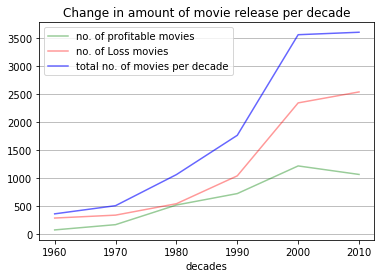%0A)

In \[13\]:

    #            QUESTION 1.5: 
    # How has the total profit, loss and budget changed per decade 
    plt.figure(figsize=(8,8))
    #plotting for total profit pre decade 
    prof_perdec = df_movies[profit].groupby('decades')['profits'].sum()
    prof_perdec.plot(kind='line',marker='o',color='green',label='total $profit per decade',alpha=.4,linewidth=4);

    #total loss will be converted to positive values so that they can be on thesame axis on the chart
    pos_loss= df_movies[loss].groupby('decades')['profits'].sum()
    pos_loss= pos_loss* -1
    pos_loss.plot(kind='line',marker ='o',color='red',alpha=.4,label='total Loss amount',linewidth=4);

    #plotting budget for profitable movies per decade
    profbudg_perdec=df_movies[profit].groupby('decades')['budget_adj'].sum()
    profbudg_perdec.plot(kind='line',marker='o',color='blue',label='total $budget for profitable movies per decade',linewidth=4)

    # plotting budget for loss movies per decade 
    lossbudg_perdec=df_movies[loss].groupby('decades')['budget_adj'].sum()
    lossbudg_perdec.plot(kind='line',marker='o',color='purple',label='total $budget for loss movies per decade',linewidth=4)
    plt.title('changes in total budget, total profit and total loss per decade',fontsize=20)
    plt.legend(fontsize=8)
    plt.ticklabel_format(style='plain')
    plt.grid(axis='y')


    #I tried adding value to each point on the plot, ended up with this code block but still failed :

    #adding values to the line plot for better understanding 
    # the series used in plotting will be converted to lists first
    ####     a=prof_perdec.tolist()
    ####     b=pos_loss.tolist()
    ####     c=profbudg_perdec.tolist()
    ####     d=lossbudg_perdec.tolist()
    ####     plotlist =[a,b,c,d]
    ####     for i in plotlist :
    ####         for j,p in enumerate(i):
    ####             plt.text(j,p,str(p))
            

![](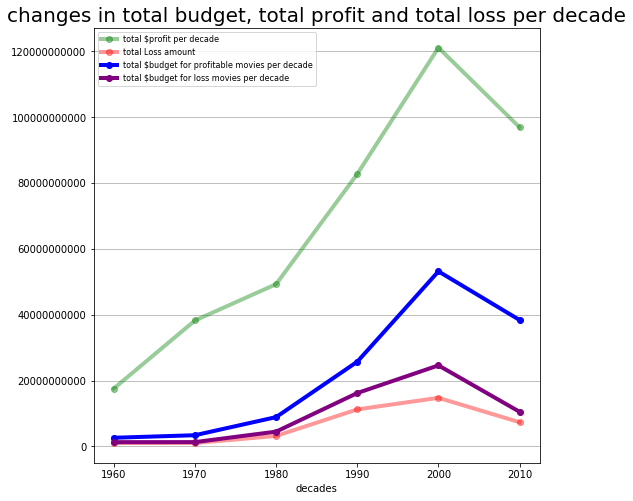%0A)

### Answer to q1   how has movie finance changed<a href="#Answer-to-q1-%C2%A0-how-has-movie-finance-changed" class="anchor-link">¶</a>

Only 34.7% of all movies released turned a profit. Despite this fact the
Total profit made from these profitable movies each decade is always
twice as much as their budget and 3 times the loss from other
unprofitable movies for  each decade. Generally the  total profit to
total loss ratio is 1:1051, while only \~35% of the total movies
released was profitable. we saw a general correlation between budget and
profit/loss

#       QUESTION 2<a href="#%C2%A0-%C2%A0-%C2%A0-QUESTION-2" class="anchor-link">¶</a>

#####   which production companies have been most successful throughout the  decade<a href="#%C2%A0-which-production-companies-have-been-most-successful-throughout-the-%C2%A0decade" class="anchor-link">¶</a>

In \[14\]:

    #checking out the production company column 
    df_movies.production_companies.head()
    #production companies might be abbreviated as pc when creating related variables throughout this section for easy reference 

Out\[14\]:

    1329      Lucasfilm|Twentieth Century Fox Film Corporation
    1386     Ingenious Film Partners|Twentieth Century Fox ...
    5231     Paramount Pictures|Twentieth Century Fox Film ...
    10594                        Warner Bros.|Hoya Productions
    9806           Universal Pictures|Zanuck/Brown Productions
    Name: production_companies, dtype: object

In \[15\]:

    #           Question 2.1
    #  which set of production companies column produced the most movies in the dataset

    df_movies.production_companies.value_counts()[1:6]

Out\[15\]:

    Paramount Pictures           156
    Universal Pictures           133
    Warner Bros.                  84
    Walt Disney Pictures          76
    Metro-Goldwyn-Mayer (MGM)     72
    Name: production_companies, dtype: int64

### Quick notice<a href="#Quick-notice" class="anchor-link">¶</a>

for this question, some movies were co produced by multiple companies .
This will not be Split into individual companies because every
collaboration represents a unique effort and by splitting, some
companies might end up taking all the credit for a movie they
contributed the least to.

In \[16\]:

    # creating decade selection variable
    d1960 = df_movies.decades == 1960
    d1970 = df_movies.decades == 1970
    d1980 = df_movies.decades == 1980
    d1990 = df_movies.decades == 1990
    d2000 = df_movies.decades == 2000
    d2010 = df_movies.decades == 2010
    #top production companies for all decades
    list1960=(df_movies[d1960].production_companies.value_counts()[1:6].index).tolist()
    list1970=(df_movies[d1970].production_companies.value_counts().head().index).tolist()       
    list1980=(df_movies[d1980].production_companies.value_counts()[1:6].index).tolist()
    list1990=(df_movies[d1990].production_companies.value_counts()[1:6].index).tolist()
    list2000=(df_movies[d2000].production_companies.value_counts()[1:6].index).tolist()
    list2010=(df_movies[d2010].production_companies.value_counts()[1:6].index).tolist()
    #adding them into a dataframe 
    df_topcompanies= pd.DataFrame({'1960':list1960,'1970':list1970,'1980':list1980,'1990':list1990,'2000':list2000,'2010':list2010})       
    df_topcompanies 

Out\[16\]:

|     | 1960                                   | 1970                    | 1980               | 1990                 | 2000                      | 2010                    |
|-----|----------------------------------------|-------------------------|--------------------|----------------------|---------------------------|-------------------------|
| 0   | Metro-Goldwyn-Mayer (MGM)              | Universal Pictures      | Paramount Pictures | Paramount Pictures   | Walt Disney Pictures      | The Asylum              |
| 1   | Universal Pictures                     | Paramount Pictures      | Universal Pictures | Universal Pictures   | New Line Cinema           | DreamWorks Animation    |
| 2   | Walt Disney Productions                | Warner Bros.            | Orion Pictures     | Touchstone Pictures  | Universal Pictures        | Marvel Studios          |
| 3   | Twentieth Century Fox Film Corporation | unknown                 | Warner Bros.       | Columbia Pictures    | Metro-Goldwyn-Mayer (MGM) | Pixar Animation Studios |
| 4   | Warner Bros.                           | Walt Disney Productions | TriStar Pictures   | Walt Disney Pictures | Dimension Films           | WWE Studios             |

In \[17\]:

    #      Question 2.2 
    # what production companies made the most profit in each decade
    # the final result will  be polluted in a dataframe created with the following dictionary 
    dict_top_earners= {}

    dic_keys=['1960 top earners','1970 top earners','1980 top earners','1990 top earners','2000 top earners','2010 top earners']
    #the following is a list holding the names of production companies with the highest profits per decade 

    top_list = [(df_movies[profit][d1960].groupby('production_companies')['profits'].sum().head().index).tolist(),
         (df_movies[profit][d1970].groupby('production_companies')['profits'].sum().head().index).tolist(),
         (df_movies[profit][d1980].groupby('production_companies')['profits'].sum().head().index).tolist(),
         (df_movies[profit][d1990].groupby('production_companies')['profits'].sum().head().index).tolist(),
         (df_movies[profit][d2000].groupby('production_companies')['profits'].sum().head().index).tolist(),
         (df_movies[profit][d2010].groupby('production_companies')['profits'].sum().head().index).tolist()]
    for x in top_list:
        dict_top_earners.update({dic_keys[0]:x})
        dic_keys.pop(0)
        

    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      if __name__ == '__main__':
    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      # Remove the CWD from sys.path while we load stuff.
    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      # This is added back by InteractiveShellApp.init_path()
    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      if sys.path[0] == '':
    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      del sys.path[0]
    /opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
      

In \[18\]:

    df_top_earners =pd.DataFrame(dict_top_earners)
    df_top_earners

Out\[18\]:

|     | 1960 top earners                                   | 1970 top earners                           | 1980 top earners                                    | 1990 top earners                                    | 2000 top earners                                     | 2010 top earners                                    |
|-----|----------------------------------------------------|--------------------------------------------|-----------------------------------------------------|-----------------------------------------------------|------------------------------------------------------|-----------------------------------------------------|
| 0   | Alfred J. Hitchcock Productions                    | 20th Century Fox                           | 1818\|Lone Wolf McQuade Associates\|Topkick Prod... | 20th Century Fox                                    | 1492 Pictures\|Warner Bros.\|Heyday Films            | 120dB Films\|Scion Films\|Voodoo Production Serv... |
| 1   | Alta Vista Productions                             | ABC Pictures                               | 20th Century Fox                                    | 20th Century Fox\|Baltimore Pictures                | 1492 Pictures\|Warner Bros.\|Heyday Films\|MIRACL... | 1492 Pictures\|Dune Entertainment\|Fox 2000 Pict... |
| 2   | American International Pictures (AIP)\|Santa Cl... | AVCO Embassy Pictures                      | 20th Century Fox\|American Entertainment Partne...  | 20th Century Fox\|Egg Pictures                      | 1492 Pictures\|Warner Bros.\|Heyday Films\|P of A... | 20th Century Fox                                    |
| 3   | Batjac Productions                                 | Algonquin                                  | 20th Century Fox\|Davis Entertainment               | 20th Century Fox\|Gruskoff/Venture Films            | 20th Century Fox                                     | 20th Century Fox\|Chernin Entertainment\|Walden ... |
| 4   | Bryna Productions                                  | American Film Institute (AFI)\|Libra Films | 20th Century Fox\|Gladden Entertainment             | 20th Century Fox\|Largo Entertainment\|JVC Enter... | 20th Century Fox\|Figment Films                      | 20th Century Fox\|Double Feature Films\|Appian W... |

## Answer to Question 2<a href="#Answer-to-Question-2" class="anchor-link">¶</a>

Production companies that produced the most movies aren't necessarily
the ones to make the most profit. For the highest number of movies
released we saw a lot of big names dominating the top 5 from their solo
productions, with companies like Walt Disney, paramount pictures,
Universal pictures and Warner bros appearing for multiple decades.

But for the most profitable set of production companies we saw a lot of
multi-production-companies team at the top 5s especially since the 80s.

#        Question 3<a href="#%C2%A0-%C2%A0-%C2%A0-%C2%A0Question-3" class="anchor-link">¶</a>

how does popularity rating affect a movies profit and how has it changes
over the decades

In \[19\]:

    #        Question 3.1
    # what Is the correlation between a movie's popularity rating and its profit 
    # for this we will be creating a scatter plot 
    y= df_movies.popularity
    x= df_movies.profits
    colors =['y','g']

    plt.scatter(x,y,alpha=.4)
    plt.title('correlation between popularity rating and profit ')
    plt.ylabel('popularity rating ')
    plt.xlabel('profit')

Out\[19\]:

    Text(0.5,0,'profit')

![](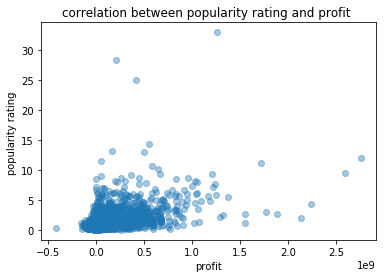%0A)

In \[20\]:

    #        QUESTION 3.2
    #   HOW HAS THE AVERAGE POPULARITY RATING CHANGEd COMPARED TO AVERAGE PROFIT AND  LOSS TGROUGh THE DECADES
    plt.figure(figsize =(10,8,))
    #plotting average popularity rating for profitable movies
    df_movies[profit].groupby('decades')['popularity'].mean().plot(kind='line',color='g',marker='o',label ='average popularity rating for profitable movies')
    #plotting average popularity rating for loss movies per decade 
    df_movies[loss].groupby('decades')['popularity'].mean().plot(kind='line',color='y',marker='o',label ='average popularity rating for loss movies')
    plt.legend()
    plt.title('changes in average popularity rating for profitable and loss movies')

Out\[20\]:

    Text(0.5,1,'changes in average popularity rating for profitable and loss movies')

![](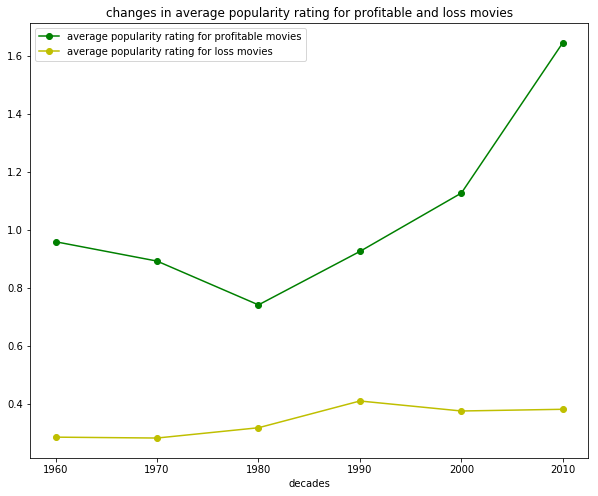%0A)

##   Answer for question 3<a href="#%C2%A0-Answer-for-question-3" class="anchor-link">¶</a>

popularity rating has a positive correlation with profit as we saw in
the chart where unprofitable movies generally has low popularity rating
and the only time it ever increases was in the 1990s which of course was
a due to an increase in number of released movie for that decade.

profitable movies generally have a high popularity rating...

In \[ \]:

     

In \[21\]:

    #relationship between a movies budget and popularity

<span id="conclusions"></span>

## Conclusions<a href="#Conclusions" class="anchor-link">¶</a>

The number of profitable movies released in a year has always been less
than number of unprofitable movies but still the profit amonut made from
these few profitable movies has always been in multitudes of the budget
of all released movies put together. The most profitable movies have a
few things in common, like they have higher budgets, are most
co-produced by top production companies and they always end up with
higher popularity ratings. top  genres feature in these movies includes
Adventure, Action and Drama.

### Limitations<a href="#Limitations" class="anchor-link">¶</a>

1.  the production companies were difficult to analyze as a group(for
    coproduced movies), and at thesame time could not be separated as
    that might lead to a bias and will not give us the truth about the
    efficiency and success of coproduced movies.
2.  the dataset stops at 2016 so the 2010 decade is only halfway
    recorded yet
3.  this analyst is a rookie and this is actually his first ever
    analysis so he might be leaving out a lot, forgive  him :)

In \[22\]:

    #from subprocess import call
    #call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])